## DSC540 week 5&6 assignment
#### Author: Xin Tang
### date: 1/18/2024

In [6]:
#import necessary packages
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re

### Exercise 1
#### Activity 7: given a Wikipedia page where you have the GDP of all countries listed. You have been asked to create three DataFrames from the three sources mentioned in the page

###### Task 1: Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure

In [9]:
'''
<table class="&quot;wikitable&quot;|}" style="margin:auto; width:100%;">
<tbody><tr>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup id="cite_ref-GDP_IMF_1-2" class="reference"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">World Bank</a> (2017)</b><sup id="cite_ref-worldbank_20-0" class="reference"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">[20]</a></sup>
</td>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/United_Nations" title="United Nations">United Nations</a> (2016)</b><sup id="cite_ref-21" class="reference"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-21">[21]</a></sup><sup id="cite_ref-22" class="reference"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-22">[22]</a></sup>
</td></tr>
<tr valign="top">
<td>

<thead><tr>
<th style="width:2em;" data-sort-type="number" class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Rank</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Country</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">GDP<br>(US$MM)
</th></tr></thead><tbody>
```
# observation summary
```
the webssite have been updated with different table format with more content, so using original htm from github.

the table title shows with key word inside <a> and </a>"

the header info for table are inside 'th' and ''/th' pair

tabel structure is <tbody> -> <tr> -> <td> or <th>
'''



###### Task 2: read the page using ps4

In [7]:
# the page has been downloaded into local as htm file and now open the page, create a soup object
# we can read from webpage address as well but the resulting page is different
# to be safe, add encoding option
fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding='utf-8')
#fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r")
soup = BeautifulSoup(fd, features="lxml")
fd.close()

###### Task 3: find out how many tables in the soup object

In [8]:
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


In [28]:
#examine what are these 9 tables.
#print(all_tables)

[<table border="0" cellpadding="2" cellspacing="0" style="float:right;">
<tbody><tr>
<td><div class="timeline-wrapper"><map name="timeline_45cabf722ffec5de02631bda1f6ccce0"></map><img src="./List of countries by GDP (nominal) - Wikipedia_files/45cabf722ffec5de02631bda1f6ccce0.png" usemap="#timeline_45cabf722ffec5de02631bda1f6ccce0"/></div>
</td></tr>
<tr>
<td style="text-align:center; font-size:100%;">Largest economies by nominal GDP in 2017<sup class="reference" id="cite_ref-GDP_IMF_1-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td></tr></tbody></table>, <table class='"wikitable"|}' style="margin:auto; width:100%;">
<tbody><tr>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of

###### Task 4: Find the right table using bs4

In [9]:
#using class name to find out the relevant table, as shown above, find out the quot means ""
# it seems if I try to find 'wikitable' it will yield null object, but it success in searching my project website
data_table = soup.find("table", {"class": '"wikitable"|}'})
#data_table = soup.find("table", {"class": '&quot;wikitable&quot;|}'})
#ensure did not return a null object
print(type(data_table))
#examine table structure
print(data_table.prettify())

<class 'bs4.element.Tag'>
<table class='"wikitable"|}' style="margin:auto; width:100%;">
 <tbody>
  <tr>
   <td style="width:33%; text-align:center;">
    <b>
     Per the
     <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">
      International Monetary Fund
     </a>
     (2017)
    </b>
    <sup class="reference" id="cite_ref-GDP_IMF_1-2">
     <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">
      [1]
     </a>
    </sup>
   </td>
   <td style="width:33%; text-align:center;">
    <b>
     Per the
     <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">
      World Bank
     </a>
     (2017)
    </b>
    <sup class="reference" id="cite_ref-worldbank_20-0">
     <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">
      [20]
     </a>
    </sup>
   </td>
   <td style="width:33%; text-align:center;">
    <b>
     Per th

###### Task 5: Find the sources and data

In [10]:
#task 5.1: find sources 
# the header is under td, which is beneath tr
# the sources are 'IMF', 'World bank' and 'UN'
# the below 2 lines could be combined but keep in place for better understanding of steps.
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print("source length:",len(sources_list))

#print(sources_list)

source length: 3


In [ ]:
# task 5.2 find data, which is inside 3 tables.
# the key word is 'tr' and 'td'

In [16]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)
data_tables = []
#print(data)
for td in data:
    data_tables.append(td.findAll('table'))

print("data length:", len(data_tables))
# will get 3 tables, each will have a list of values
#print(data_tables)

data length: 3


###### Task 6 Checking how to get the source names

In [14]:
# the source name is within <a> and </a>, use gettext to extract them, since length is 3, so we will get 3 names
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


###### Task 7 Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that

In [13]:
# as shown below, the header of table is inside 'thread', then under 'th'
'''
<thead><tr>
<th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$MM)
'''
table[0][0] is the first table for IMF
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [19]:
#skip first row, which is world data, start from [1] and rest
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
# as shown below, from tr, data number is within td. using strip to get rid of n\
'''
<td align="right">1</td>
<td align="right">19,390,600</td></tr>
'''
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
#check get the first record correct
print(data_rows1[0])

['1', 'United States', '19,390,600']


In [20]:
# constructure dataframe from header1 and data_rows1 list
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head(4)

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"


###### Task 8 Do the same for the other two sources

In [21]:
#the second source is in [1][0]
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]

['Rank', 'Country', 'GDP(US$MM)']

In [25]:
#same way to find row on second sources
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
#print(rows2)
'''
for this table, the third <td></td> pair has special character ♠, not sure why, so move index by 1 and find number
<td align="right"><span class="sortkey" style="display:none">7007193906040000000♠</span>19,390,604
'''
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()
    
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]    

#create data frame
df2 = pd.DataFrame(data_rows2, columns=header2)


[<tr>
<td align="right">1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
<td align="right"><span class="sortkey" style="display:none">7007193906040000000♠</span>19,390,604
</td></tr>, <tr style="background-color:#eaecf0">
<td align="right" data-sort-value="0"> </td>
<td><i><span class="flagicon"><img alt="" class="thumbborder" data-file-height="540" data-file-width="810" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_

In [23]:
#create data frame
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head(4)

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"


In [24]:
#doing same for third table. still use the defined function find_right_text
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]

rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


### End of exercise 1

### Exercise 2
#### Activity 8: Handling Outliers and Missing Data
##### using csv provided, clean the data by using come up with a nicely formatted DataFrame. Identify the type of outliers and their effect on the data and clean the messy data

###### Task 1. Read the visit_data.csv file

In [19]:
# the csv had been downloaded into local
df = pd.read_csv("visit_data.csv")
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


###### Task 2. check duplicate

In [20]:
# use 'any' and 'duplicated' method
# use {} and format 
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))
print("IP address is duplicated - {}".format(any(df.ip_address.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False
IP address is duplicated - False


###### Task 3. Check if any essential column contains NaN

In [22]:
# from the head(), there are NaN values.
# this time use %, not format method
# both %r and %s works. %r show raw output
print("The column First Name contains NaN - %r " % df.first_name.isnull().values.any())
print("The column Last Name contains NaN - %r " % df.last_name.isnull().values.any())
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column First Name contains NaN - True 
The column Last Name contains NaN - True 
The column Email contains NaN - False 
The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


###### Task 4. Get rid of the outliers

In [72]:
#looks like there is no unreasonable value (infinite value) in visit, only empty cell
d_clean = df[np.isfinite(df['visit'])]
print(d_clean.shape)
print('the count of null visit is:',(df['visit'].isnull().sum()))

(974, 7)
the count of null visit is: 26


###### Task 5. report size difference

In [73]:
# as show above, 26 empty cell was cause of difference of before and after
print("The size of previous data was {prev[0]} rows and the size of the new one is {after[0]} rows".
      format(prev=df.shape, after=d_clean.shape))
print('difference is', df['visit'].isnull().sum())

The size of previous data was 1000 rows and the size of the new one is 974 rows
difference is 26


###### Task6. Create a box plot to check for outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b615987f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6159911d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b615987790>],
 'medians': [<matplotlib.lines.Line2D at 0x1b615992190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b61583ecd0>],
 'means': []}

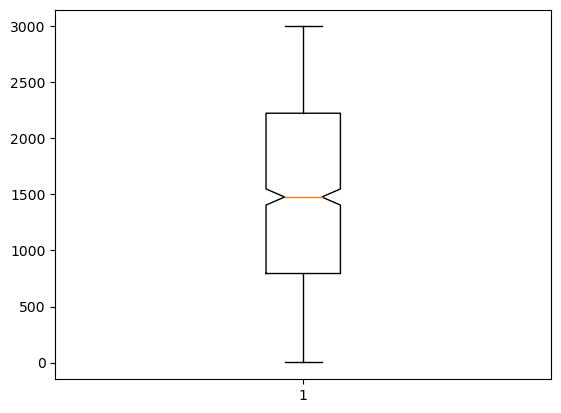

In [74]:
plt.boxplot(d_clean.visit, notch=True)
# mean is at 1500, first and third percentile is at 700 and 2900

###### Task 7. Get rid of any outliers

In [79]:
#from plot above, the outline is any visit >2900 or <700
short is the shape so have 2 parameters, take the row count by using [0]
df_short = df[(df['visit'] <= 2900) & (df['visit'] >= 700)]  # Notice the powerful & operator
print('only {short[0]} data record left after visit outliner removed'.format(short=df_short.shape))

only 733 data record left after visit outliner removed


### End of exercise 2

### Exercise 3 SQL exercise
#### Insert data into a SQL Lite database – create a table with the following data below that you will create yourself, with at least 10 rows of Name, Address, City, State, Zip, Phone Number

In [8]:
import sqlite3

#create the database structure first, define columns and data type, Table name is test
query = """
CREATE TABLE test
(Name VARCHAR(20), Address VARCHAR(20), City VARCHAR(20), State VARCHAR(20),
 Zip INTEGER,        [Phone Number] VARCHAR(20)
);"""

con = sqlite3.connect("trialdata.sqlite")
con.execute(query)
con.commit()

In [9]:
#create dummy data and insert in by using 'executemany' command
data = [("Person1", "1234 A street", "Dallas", "TX", 12345, "214-000-0000"),
        ("Person2", "2345 A street", "Dallas", "TX", 12345, "214-000-0001"),
        ("Person3", "3456 B street", "Lubbock", "TX", 12345, "806-000-0002"),
        ("Person4", "4567 B street", "Lubbock", "TX", 12345, "806-000-0003"),
        ("Person5", "5678 C street", "Waco",  "TX", 12345, "254-000-0004"),
        ("Person6", "6789 C street", "Waco", "TX", 12345, "254-000-0005"),
        ("Person7", "7890 D street", "Houston", "TX", 12345, "281-000-0006"),
        ("Person8", "8900 D street", "Houston", "TX", 12345, "346-000-0007"),
        ("Person9", "9000 E street", "Austin", "TX", 12345, "737-000-0008"),
        ("Person10", "1000 E street", "Austin", "TX", 12345, "512-000-0009")
       ]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?, ?, ?)"

con.executemany(stmt, data)
con.commit()

In [5]:
#read back the data, select all columns, looks like insert is successful
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

[('Person1', '1234 A street', 'Dallas', 'TX', 12345, '214-000-0000'),
 ('Person2', '2345 A street', 'Dallas', 'TX', 12345, '214-000-0001'),
 ('Person3', '3456 B street', 'Lubbock', 'TX', 12345, '806-000-0002'),
 ('Person4', '4567 B street', 'Lubbock', 'TX', 12345, '806-000-0003'),
 ('Person5', '5678 C street', 'Waco', 'TX', 12345, '254-000-0004'),
 ('Person6', '6789 C street', 'Waco', 'TX', 12345, '254-000-0005'),
 ('Person7', '7890 D street', 'Houston', 'TX', 12345, '281-000-0006'),
 ('Person8', '8900 D street', 'Houston', 'TX', 12345, '346-000-0007'),
 ('Person9', '9000 E street', 'Austin', 'TX', 12345, '737-000-0008'),
 ('Person10', '1000 E street', 'Austin', 'TX', 12345, '512-000-0009'),
 ('Person1', '1234 A street', 'Dallas', 'TX', 12345, '214-000-0000'),
 ('Person2', '2345 A street', 'Dallas', 'TX', 12345, '214-000-0001'),
 ('Person3', '3456 B street', 'Lubbock', 'TX', 12345, '806-000-0002'),
 ('Person4', '4567 B street', 'Lubbock', 'TX', 12345, '806-000-0003'),
 ('Person5', '567

In [10]:
# construct the dataframe bypassing the tuples, cursor.description has column names.

cursor.description
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,Name,Address,City,State,Zip,PHONENumber
0,Person1,1234 A street,Dallas,TX,12345,214-000-0000
1,Person2,2345 A street,Dallas,TX,12345,214-000-0001
2,Person3,3456 B street,Lubbock,TX,12345,806-000-0002
3,Person4,4567 B street,Lubbock,TX,12345,806-000-0003
4,Person5,5678 C street,Waco,TX,12345,254-000-0004
5,Person6,6789 C street,Waco,TX,12345,254-000-0005
6,Person7,7890 D street,Houston,TX,12345,281-000-0006
7,Person8,8900 D street,Houston,TX,12345,346-000-0007
8,Person9,9000 E street,Austin,TX,12345,737-000-0008
9,Person10,1000 E street,Austin,TX,12345,512-000-0009


In [12]:
# now read the sql database, select everything from table test 

import sqlalchemy as sqla
db = sqla.create_engine("sqlite:///trialdata.sqlite")
pd.read_sql("SELECT * FROM test", db)

,Name,Address,City,State,Zip,Phone Number
0,Person1,1234 A street,Dallas,TX,12345,214-000-0000
1,Person2,2345 A street,Dallas,TX,12345,214-000-0001
2,Person3,3456 B street,Lubbock,TX,12345,806-000-0002
3,Person4,4567 B street,Lubbock,TX,12345,806-000-0003
4,Person5,5678 C street,Waco,TX,12345,254-000-0004
5,Person6,6789 C street,Waco,TX,12345,254-000-0005
6,Person7,7890 D street,Houston,TX,12345,281-000-0006
7,Person8,8900 D street,Houston,TX,12345,346-000-0007
8,Person9,9000 E street,Austin,TX,12345,737-000-0008
9,Person10,1000 E street,Austin,TX,12345,512-000-0009


### The end 